# "Blog - migrate to quarto"
> "following migration guide from Hamel Hussain"
- show_tags: true
- toc: true
- branch: master
- badges: false
- comments: true
- categories: [nbdev, quarto, fastpages]
- image: images/icons/fastai.png


# Inspiration

Hamel just announced that [fastpages will be discontinued](https://forums.fast.ai/t/fastpages-deprecating-fastpages-in-favor-of-quarto/99095) as nbdev+quarto is now a valid option to provide a blogging platform.
He has written a [migration guide](https://nbdev.fast.ai/tutorials/blogging.html) for that. 

This is my walkthrough.


# Walkthrough

## install quarto

```bash
$ sudo apt install quarto
[sudo] password for guillaume:
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
quarto is already the newest version (1.1.189).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
```

will have to see what will happen on platforms where I don't have admin rights.

Here Quarto is already present because I use it for nbdev2.


## create repo `blog`

I create `blog` repo on github.

And I can now get it locally: `git clone https://github.com/castorfou/blog.git` (I am from office, only https is accepted)

## create a quarto blog

```bash
cd ~/git/blog
quarto create-project --type website:blog .
quarto install extension quarto-ext/video
```

Issue here with 

```bash
$ quarto install extension quarto-ext/video
Sending fatal alert BadCertificate
ERROR: TypeError: error sending request for url (https://github.com/quarto-ext/video/archive/refs/heads/main.tar.gz): error trying to connect: invalid peer certificate contents: invalid peer certificate: UnknownIssuer
```

I have opened an issue at https://github.com/quarto-ext/video/issues/27

## copy former blog content - notebooks and markdown files

Your new repo will have a `posts/` directory. 

This is where you will copy all of your notebook and markdown posts from fastpages. 

```bash
cp -r ../guillaume_blog/_notebooks/* posts/
cp -r ../guillaume_blog/_posts/* posts/
```

I have to fix some stuff here, 

some markdown posts have empty description which is not allowed by the migration process.

To fix that I will run `sed -i -- 's/^description:[[:space:]*]$/description:\ \"\"/' ~/git/blog/posts/*.md`

Globally to identify culprit, I execute this:
```bash
for FILE in ../guillaume_blog/_posts/*; \
do echo $FILE; \
cp "$FILE" posts/; \
sed -i -- 's/^description:[[:space:]*]$/description:\ \"\"/' ~/git/blog/posts/*.md; \
nbdev_migrate --path posts; \
rm -f posts/* 2> /dev/null; \
done;
```

```bash
# empty description
sed -i -- 's/^description:[[:space:]*]$/description:\ \"\"/' ~/git/blog/posts/*.md
# don't know what is wrong with this one, will see with Hamel
rm posts/2021-02-10-college-de-france-representations-parcimonieuses.md
# code should not be here
rm posts/notebook2script.py 
rm -rf posts/exp
```

What was wrong with `2021-02-10-college-de-france-representations-parcimonieuses.md` was accents in title. Removing é with e fixed it.

## copy former blog content - images

```bash
cp -r ../guillaume_blog/images/* posts
cp -r ../guillaume_blog/images/copied_from_nb/* posts
```

## migrate posts to quarto

```bash
conda activate dataset_tools #this is an env with nbdev installed
nbdev_migrate --path posts
```

## update some files

- `.gitignore`: we suggest adding `_site/` as well as dot files `.*`
- `about.qmd`: I reuse my former `_pages/about.md`
- `profile.jpg`: and use my profile picture

In [12]:
!cat ~/git/blog/.gitignore

/.quarto/
_site/
.*


## preview

```bash
quarto preview
```

Here we can fix many thinks, and auto update rendered pages is just excellent!

* move images from posts to posts/images (have to restart quarto preview after that)
* delete the 2 examples (welcome and post-with-code)

Will have to browse through all the site to see if all is properly rendered. 
> fix for broken links or Jekyll shortcodes (things with {% ... %}) that need to be converted to Quarto. Search the the Quarto documentation if you need help locating specific Quarto features.



And review different options of [fastpages and quarto](https://nbdev.fast.ai/tutorials/blogging.html#configuration-options-fastpages-vs.-quarto)

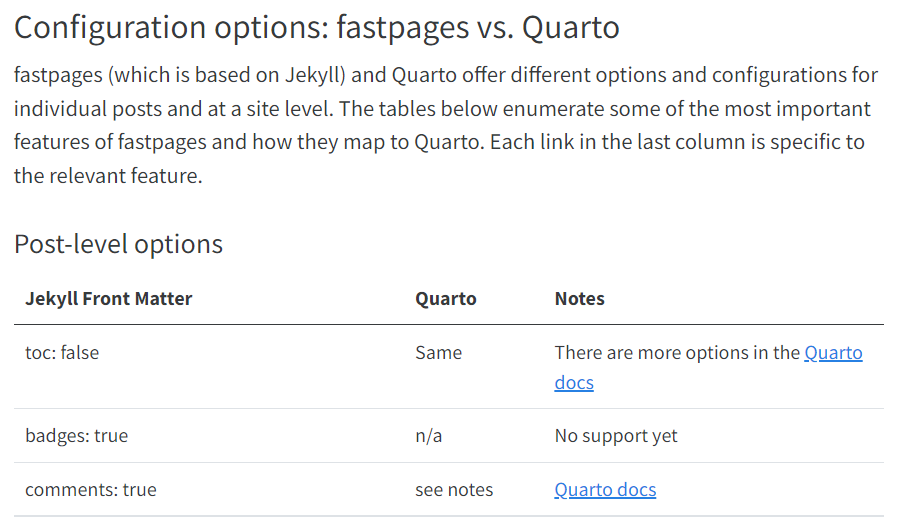

## publication

There are 2 ways to publish. A straightforword one by calling `quarto publish`. And a more advanced one with github actions.

Using my corporate PC, `quarto publish` fails so I will give github actions a try.

### quarto publish

```bash
quarto publish
```

:heavy_check_mark: This is ok when publishing with home PC. 

:x: But fails when publishing with corporate PC.

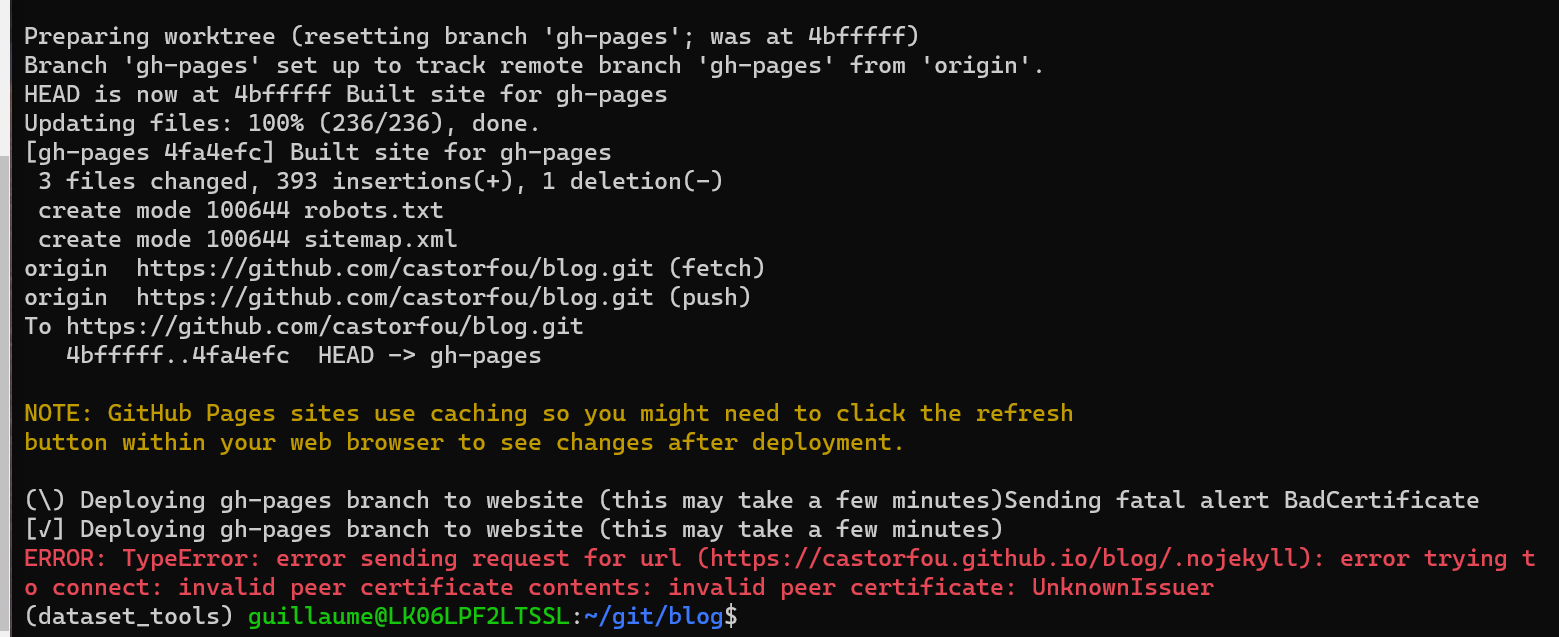

shared it with community at discord:
https://discord.com/channels/689892369998676007/1020178609605984267/1020631703653462038

### github actions

as explained in https://quarto.org/docs/publishing/quarto-pub.html#github-action

#### _publish.yml

First step is to set `_publish.yml`

```bash
- source: project
  quarto-pub:
    - id: "5f3abafe-68f9-4c1d-835b-9d668b892001"
      url: "https://castorfou.github.io/blog/"
```

but what is this id?

# Issues / improvments

## quarto publishing issue behind firewall



Identical to error happening when installing quarto extension

https://github.com/quarto-ext/video/issues/27


```bash
$ quarto publish
? Publish update to: › https://castorfou.github.io/blog/ (GitHub Pages)
From https://github.com/castorfou/blog
 * branch            gh-pages   -> FETCH_HEAD
 
origin  https://github.com/castorfou/blog.git (fetch)
origin  https://github.com/castorfou/blog.git (push)
To https://github.com/castorfou/blog.git
 + 0a3710d...1aeaf23 HEAD -> gh-pages (forced update)
fatal: 'fadc274b' is not a working tree

NOTE: GitHub Pages sites use caching so you might need to click the refresh
button within your web browser to see changes after deployment.

(\) Deploying gh-pages branch to website (this may take a few minutes)Sending fatal alert BadCertificate
[✓] Deploying gh-pages branch to website (this may take a few minutes)
ERROR: TypeError: error sending request for url (https://castorfou.github.io/blog/.nojekyll): error trying to connect: invalid peer certificate contents: invalid peer certificate: UnknownIssuer
```

For context, I use quarto as a replacement of fastai/fastpages and followed a migration guide from Hamel Hussain asking for this installation.

And I'm in a corporate environment with transparent proxies and self signed certificates. 
My system has updated CERT in /usr/local/share/ca-certificates/, and SSL_CERT_FILE environment variable pointing to updated corporate pem.

```
$ quarto install extension quarto-ext/lightbox
Sending fatal alert BadCertificate
ERROR: TypeError: error sending request for url (https://github.com/quarto-ext/lightbox/archive/refs/heads/main.tar.gz): error trying to connect: invalid peer certificate contents: invalid peer certificate: UnknownIssuer
```
It fails with the same message. 
When I run `quarto publish` I have the same issue.


One option is to use github actions. Need to find what is this id used in _publish.yml

## inline images are not properly rendered

if I have 2 images in 2 cells, it works in jupyter notebook but it is not rendered properly when published.

## Albert Rapp as an example

https://albert-rapp.de/posts/13_quarto_blog_writing_guide/13_quarto_blog_writing_guide.html

## links are not rendered as links

in jupyter, just typing url turns it into a link. Not with quarto.

anyway to do it ?

--test--